In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [392]:
df=pd.read_csv('Space_server.csv')

In [393]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [394]:
df.shape

(10000, 18)

In [395]:
df['rerun'].unique()

array([301], dtype=int64)

As 'rerun' is having one value, hence it won't put any effect on the dataset so we can drop it.

In [396]:
df.drop('rerun',inplace=True,axis=1)

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   camcol     10000 non-null  int64  
 10  field      10000 non-null  int64  
 11  specobjid  10000 non-null  float64
 12  class      10000 non-null  object 
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 1.3+ MB


In [398]:
df.isnull().any()

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

No Null values can be seen.

In [399]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [400]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

<AxesSubplot:>

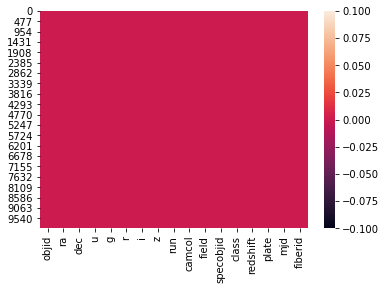

In [401]:
sns.heatmap(df.isnull())

Aabsence of null value is been represented through heatmap

In [402]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [403]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Observation:- 1.Columns such as ra,dec,run,field,plate,mjd,fiberid are having high standard deviation which implies that the data is highly deviated.
              2. Outliers can also be seen in some columns.
              3. Some columns are having skewness as well.

In [404]:
from sklearn.preprocessing import LabelEncoder

In [405]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [406]:
df

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


Converted the categorical data into numeric data. Class has been converted to numeric data from categorical data.

df.corr()

<AxesSubplot:>

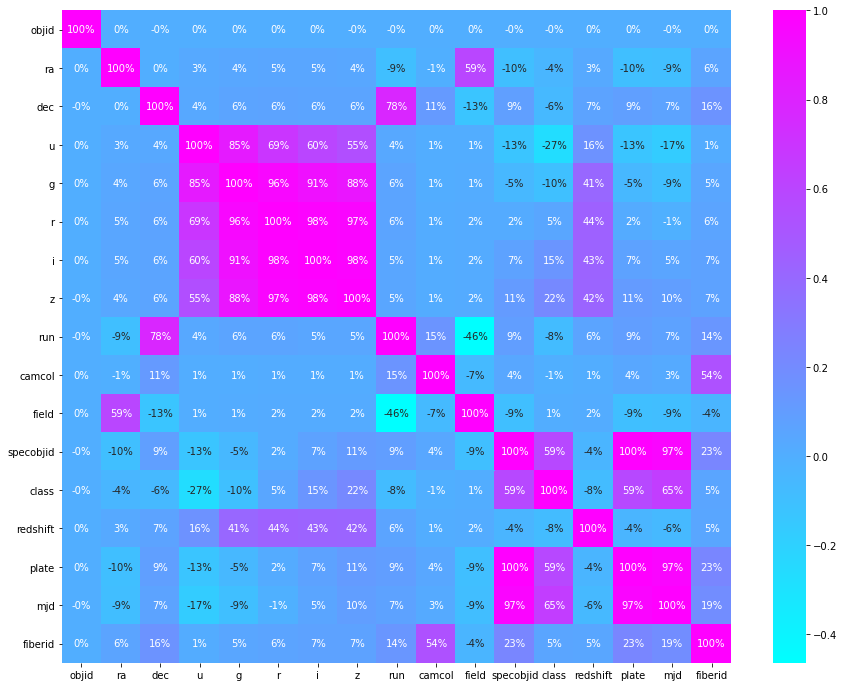

In [407]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='cool',fmt='.0%')

Representing the data into heat map to find the correaltion with the target variable.

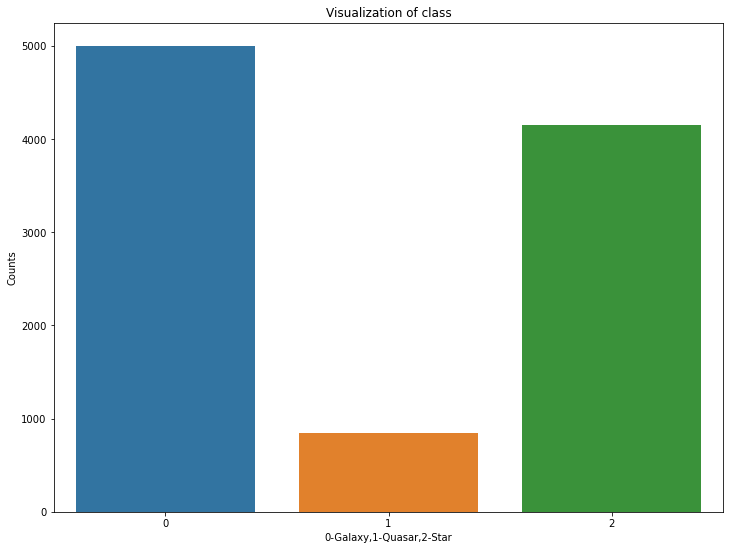

In [408]:
plt.figure(figsize=(12,9))
sns.countplot(x='class',data=df)
plt.xlabel('0-Galaxy,1-Quasar,2-Star')
plt.ylabel('Counts')
plt.title('Visualization of class')
plt.show()

Representing with help of count plot, the number of Galaxy,Quasar,Star.

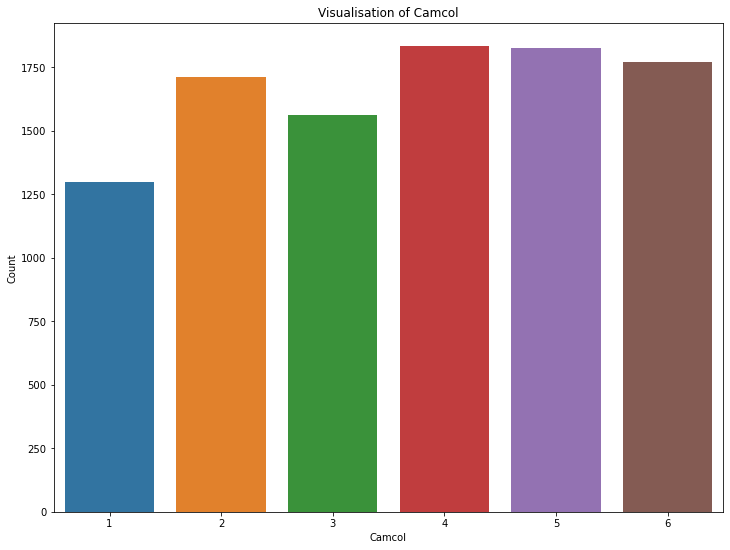

In [409]:
plt.figure(figsize=(12,9))
sns.countplot(x='camcol',data=df)
plt.xlabel('Camcol')
plt.ylabel('Count')
plt.title('Visualisation of Camcol')
plt.show()

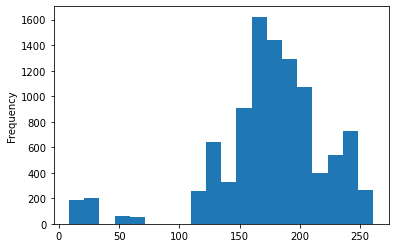

In [410]:
df['ra'].plot.hist(bins=20)
plt.show()

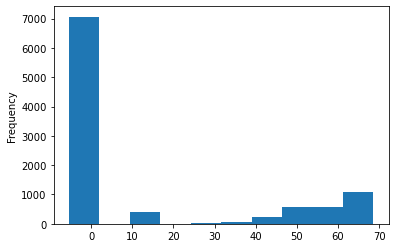

In [411]:
df['dec'].plot.hist()
plt.show()

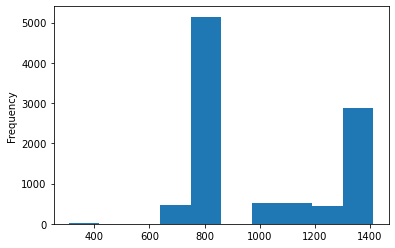

In [412]:
df['run'].plot.hist()
plt.show()

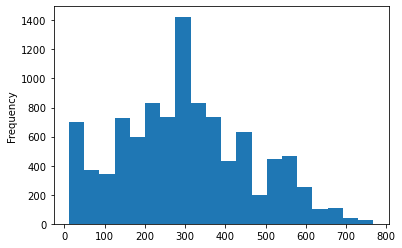

In [413]:
df['field'].plot.hist(bins=20)
plt.show()

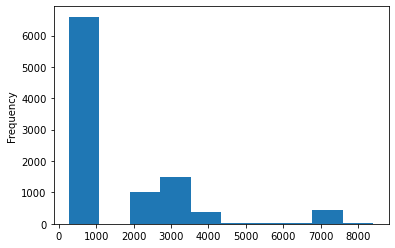

In [414]:
df['plate'].plot.hist()
plt.show()

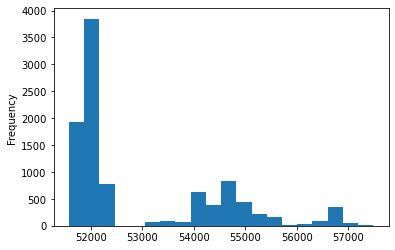

In [415]:
df['mjd'].plot.hist(bins=20)
plt.show()

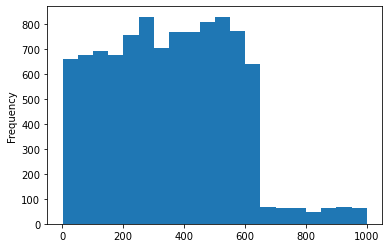

In [416]:
df['fiberid'].plot.hist(bins=20)
plt.show()

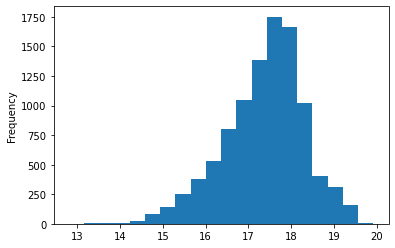

In [417]:
df['g'].plot.hist(bins=20)
plt.show()

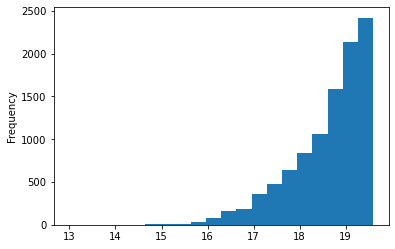

In [418]:
df['u'].plot.hist(bins=20)
plt.show()

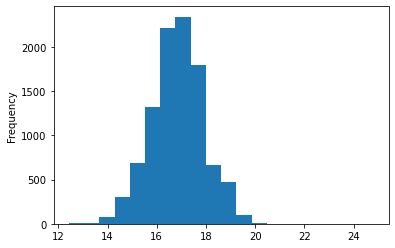

In [419]:
df['r'].plot.hist(bins=20)
plt.show()

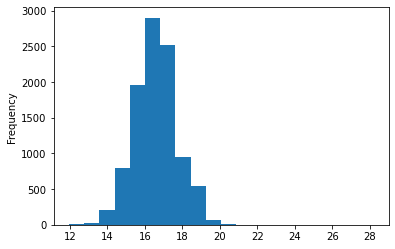

In [420]:
df['i'].plot.hist(bins=20)
plt.show()

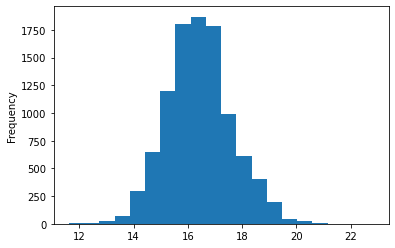

In [421]:
df['z'].plot.hist(bins=20)
plt.show()

All the above histograms represent the distribution of data in different columns. 

In [422]:
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

objid           AxesSubplot(0.125,0.749828;0.168478x0.130172)
ra           AxesSubplot(0.327174,0.749828;0.168478x0.130172)
dec          AxesSubplot(0.529348,0.749828;0.168478x0.130172)
u            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
g               AxesSubplot(0.125,0.593621;0.168478x0.130172)
r            AxesSubplot(0.327174,0.593621;0.168478x0.130172)
i            AxesSubplot(0.529348,0.593621;0.168478x0.130172)
z            AxesSubplot(0.731522,0.593621;0.168478x0.130172)
run             AxesSubplot(0.125,0.437414;0.168478x0.130172)
camcol       AxesSubplot(0.327174,0.437414;0.168478x0.130172)
field        AxesSubplot(0.529348,0.437414;0.168478x0.130172)
specobjid    AxesSubplot(0.731522,0.437414;0.168478x0.130172)
class           AxesSubplot(0.125,0.281207;0.168478x0.130172)
redshift     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
plate        AxesSubplot(0.529348,0.281207;0.168478x0.130172)
mjd          AxesSubplot(0.731522,0.281207;0.168478x0.130172)
fiberid 

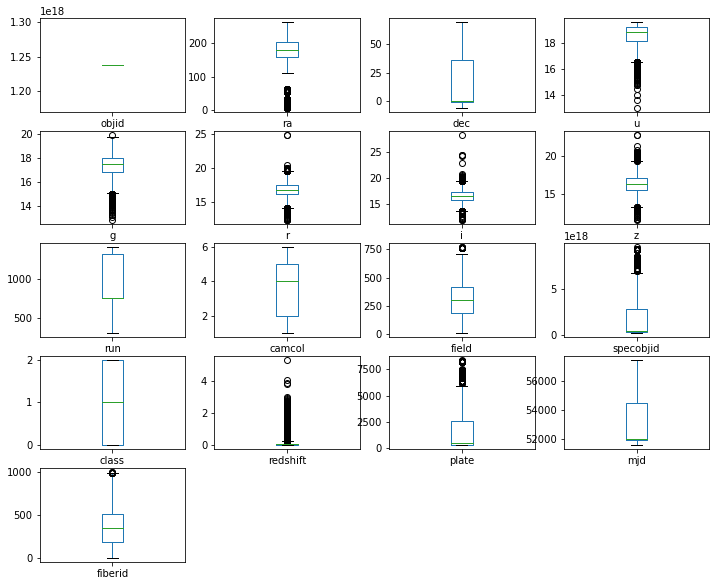

In [423]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(12,10))

Observation:

The data point are so intimately gathered together that we can not remove the outliers. The whole column will get removed if we try to take the outliers by z-score

In [424]:
y=df['class']
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [425]:
x=df.drop('class',axis=1)
x

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [426]:
from sklearn.preprocessing import StandardScaler

In [427]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [430]:
x_train.shape

(8000, 16)

In [431]:
x_test.shape

(2000, 16)

In [432]:
y_train.shape

(8000,)

In [433]:
y_test.shape

(2000,)

In [434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [435]:
model=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),BaggingClassifier(),GradientBoostingClassifier()]

In [436]:
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,predm))
    print('Confusion Matrix',confusion_matrix(y_test,predm))
    print('Classification Report',classification_report(y_test,predm))
    print('***************************************************************************************')
    print('\n')

Score of RandomForestClassifier() is 1.0
Accuracy Score 0.9895
Confusion Matrix [[1001    7    4]
 [   9  147    1]
 [   0    0  831]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1012
           1       0.95      0.94      0.95       157
           2       0.99      1.00      1.00       831

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

***************************************************************************************


Score of DecisionTreeClassifier() is 1.0
Accuracy Score 0.988
Confusion Matrix [[1000   11    1]
 [   9  147    1]
 [   2    0  829]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1012
           1       0.93      0.94      0.93       157
           2       1.00      1.00      1.00       831

In [437]:
model=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),BaggingClassifier(),GradientBoostingClassifier()]

In [438]:
for m in model:
    score=cross_val_score(m,x,y,scoring='accuracy',cv=10)
    print('Model',m)
    print('Score',score)
    print('Mean Score',score.mean())
    print('Standard Deviation',score.std())
    print('***************************************************************************')
    print('\n')

Model RandomForestClassifier()
Score [0.99  0.988 0.989 0.993 0.989 0.993 0.984 0.983 0.989 0.985]
Mean Score 0.9883
Standard Deviation 0.003257299494980469
***************************************************************************


Model DecisionTreeClassifier()
Score [0.987 0.98  0.983 0.975 0.994 0.985 0.977 0.98  0.986 0.98 ]
Mean Score 0.9827
Standard Deviation 0.005254521862167865
***************************************************************************


Model KNeighborsClassifier()
Score [0.922 0.874 0.924 0.894 0.871 0.909 0.853 0.892 0.894 0.908]
Mean Score 0.8940999999999999
Standard Deviation 0.02172302925468731
***************************************************************************


Model SVC()
Score [0.972 0.952 0.974 0.96  0.957 0.961 0.932 0.944 0.968 0.953]
Mean Score 0.9572999999999998
Standard Deviation 0.012223338332877795
***************************************************************************


Model AdaBoostClassifier()
Score [0.912 0.778 0.895 0.776 

GradientBoost gives the best accuracy score of more than 98%,hence it is selected.

In [439]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.989
[[996  15   1]
 [  4 152   1]
 [  1   0 830]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1012
           1       0.91      0.97      0.94       157
           2       1.00      1.00      1.00       831

    accuracy                           0.99      2000
   macro avg       0.97      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



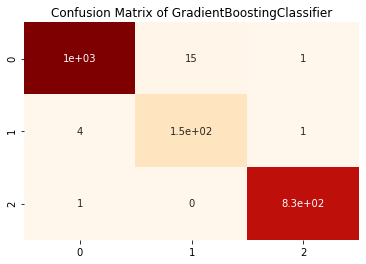

In [440]:
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cmap='OrRd',cbar=False)
plt.title('Confusion Matrix of GradientBoostingClassifier')
plt.show()

# Saving

In [441]:
import pickle

In [442]:
filename='Space_server.pkl'
pickle.dump(gbc,open(filename,'wb'))